### Imports

In [1]:
import os
from os import path, makedirs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load the beta-VAE module
import bvae_model as bvae
import spectrum_preprocessing as sp

### Load raw spectra

In [2]:
#your path

path = "C:/Users/Zach/Documents/GitHub/betaVAE_Training/training_data/SMP65#010 100d 820um.csv"


In [3]:
filename = path.split("/")[-1]
filename

'SMP65#010 100d 820um.csv'

In [4]:
df = pd.read_csv(path, skiprows=[1,2])  # Skip metadata rows if present

if df.isnull().values.any():
    df = df.fillna(method='ffill').fillna(method='bfill')

print(f"Dataframe shape: {df.shape}")

Dataframe shape: (6144, 2100)


In [5]:
df

,map_x,map_y,Sample Name,1981.7 - 2095.8,3997.9328286151754,3996.348861567388,3994.7648945196006,3993.1809274718134,3991.5969604240263,3990.0129933762387,...,693.7775669308426,692.1935998830554,690.6096328352678,689.0256657874806,687.4416987396935,685.8577316919059,684.2737646441187,682.6897975963311,681.105830548544,679.5218635007568
0,40988.1,23137.0,100d 830um,3.56471,0.075900,0.074176,0.073966,0.075273,0.076928,0.078078,...,0.133647,0.098715,0.087391,0.082232,0.072799,0.067449,0.067378,0.070742,0.074472,0.069916
1,40993.5,23137.0,100d 830um,3.70316,0.075805,0.075963,0.075566,0.075201,0.075406,0.075979,...,0.120393,0.162610,0.207877,0.264400,0.367903,0.220600,0.143469,0.100913,0.074106,0.059639
2,40999.0,23137.0,100d 830um,3.66241,0.077109,0.077163,0.077198,0.077513,0.078173,0.078872,...,0.116944,0.107451,0.127093,0.165951,0.198905,0.190144,0.140540,0.113142,0.098431,0.073741
3,41004.4,23137.0,100d 830um,3.64779,0.080267,0.079995,0.079703,0.079867,0.080385,0.081000,...,0.093809,0.079438,0.077457,0.092033,0.081979,0.043541,0.023249,0.006789,0.002548,-0.008387
4,41009.8,23137.0,100d 830um,3.65807,0.096965,0.096660,0.096759,0.096902,0.096618,0.096349,...,0.062223,0.064121,0.070408,0.087047,0.106507,0.103967,0.087356,0.075343,0.070307,0.072031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,41308.7,23652.1,100d 830um,3.55713,0.086213,0.086461,0.086270,0.085896,0.085770,0.086314,...,0.095764,0.085223,0.079973,0.087160,0.115312,0.137732,0.124038,0.105465,0.096168,0.099332
6140,41314.1,23652.1,100d 830um,3.56724,0.084475,0.084394,0.084341,0.084130,0.083858,0.083869,...,0.223694,0.212846,0.173340,0.130686,0.122818,0.146429,0.150878,0.135819,0.133027,0.137714
6141,41319.5,23652.1,100d 830um,3.88041,0.075956,0.076825,0.077911,0.079233,0.080177,0.080447,...,0.080702,0.075395,0.110483,0.154475,0.161647,0.136571,0.113395,0.108877,0.134864,0.161937
6142,41325.0,23652.1,100d 830um,3.54102,0.078224,0.078216,0.078796,0.079493,0.079931,0.080329,...,0.113463,0.101501,0.104725,0.123626,0.130365,0.133432,0.139688,0.145899,0.150183,0.161371


# Sort the wavenumber columns and data and put in a dataframe
- necessary for input to pipeline below

In [6]:
wavenumber = df.columns.values[4:].astype(float)
wavenumber.sort()
wavenumber = wavenumber.astype(str)
spectra_df = df[wavenumber].copy()
np.dtype(spectra_df.columns.values.astype(float)[0])

dtype('float64')

### Run the pipeline
The `bvae.pipeline()` returns the interpolated wavenumber array; the interpolated absorbance array; the beta-model encodings L1 L2 and L3; the reconstruction MSE; and the reconstructed spectrum.

In [7]:
L1_list=[]
L2_list=[]
L3_list=[]
MSE_list=[]
wavenumber_list=[]
absorbance_list=[]
reconstructed_list=[]
for i in range(spectra_df.shape[0]):    
    f = spectra_df.columns.values[:].astype('float32')
    a = spectra_df.iloc[i,:].values
    try:
        wavenumber, absorbance, encodings, mse, reconstructed = bvae.bvae_pipeline(f, a)
        L1 = encodings[0]
        L2 = encodings[1]
        L3 = encodings[2]
    except Exception as e:
        print(e)
        L1 = 0
        L2 = 0
        L3 = 0
        mse = 100
        reconstructed = np.zeros(len(wavenumber))
        
    L1_list.append(L1)
    L2_list.append(L2)
    L3_list.append(L3)
    MSE_list.append(mse)
    absorbance_list.append(absorbance)
    reconstructed_list.append(reconstructed)
    
    #print(encodings)
    #print(mse)


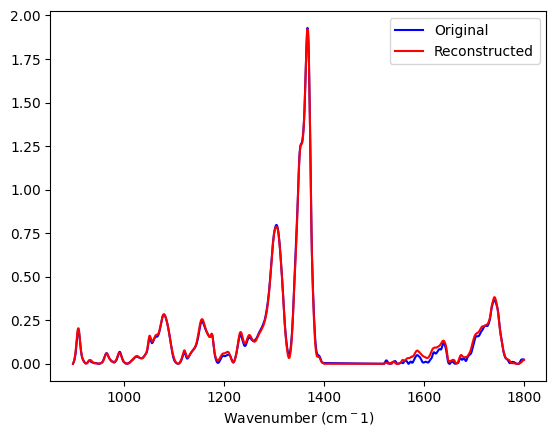

In [8]:
plt.plot(wavenumber, absorbance, c='b')
plt.plot(wavenumber, reconstructed, c='r')
plt.legend(['Original','Reconstructed'])
plt.xlabel(f'Wavenumber (cm$^{-1}$)')
plt.show()

# Save results to dataframe

In [9]:
hyperspectrum =pd.DataFrame(absorbance_list)
hyperspectrum.columns = wavenumber
hyperspectrum['map_x'] = df['map_x'].values
hyperspectrum['map_y'] = df['map_y'].values

Index([ 898.0,  899.0,  900.0,  901.0,  902.0,  903.0,  904.0,  905.0,  906.0,
        907.0,
       ...
       1791.0, 1792.0, 1793.0, 1794.0, 1795.0, 1796.0, 1797.0, 1798.0, 1799.0,
       1800.0],
      dtype='object', length=784)


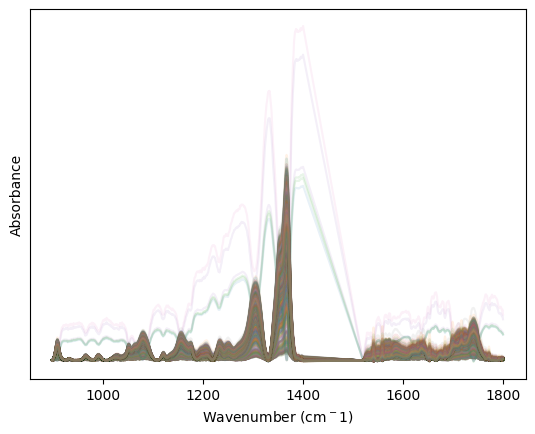

In [11]:
reconstructed=pd.DataFrame(reconstructed_list)
reconstructed.columns = wavenumber
reconstructed['map_x'] = df['map_x'].values
reconstructed['map_y'] = df['map_y'].values

print(reconstructed.columns[:-2])
for i in range(len(reconstructed.iloc[:,:-2])):
    plt.plot(reconstructed.columns[:-2], reconstructed.iloc[i,:-2], alpha=0.1)


plt.xlabel(f'Wavenumber (cm$^{-1}$)')
plt.ylabel('Absorbance')
plt.yticks([])
plt.show()

In [ ]:
bvae_df =pd.DataFrame()
bvae_df['map_x'] = df['map_x'].values
bvae_df['map_y'] = df['map_y'].values
bvae_df['L1'] = L1_list
bvae_df['L2'] = L2_list
bvae_df['L3'] = L3_list
bvae_df['MSE'] = MSE_list

# Save to csv files for viewing in Quasar

In [ ]:
path_to_save = 'C:/Users/Zach/Documents/GitHub/BVAE_processed/'
makedirs(path_to_save, exist_ok=True)
bvae_df.to_csv(path_to_save +'bvae_'+filename)

In [ ]:
path_to_save = "C:/Users/Zach/Documents/GitHub/Hyperspectra/"
makedirs(path_to_save, exist_ok=True)

hyperspectrum.to_csv(path_to_save + 'hyperspectrum_'+ filename, index=False)

In [ ]:
path_to_save = "C:/Users/Zach/Documents/GitHub/Reconstructions/"
makedirs(path_to_save, exist_ok=True)
reconstructed.to_csv(path_to_save +'reconstructed_'+filename, index=False)